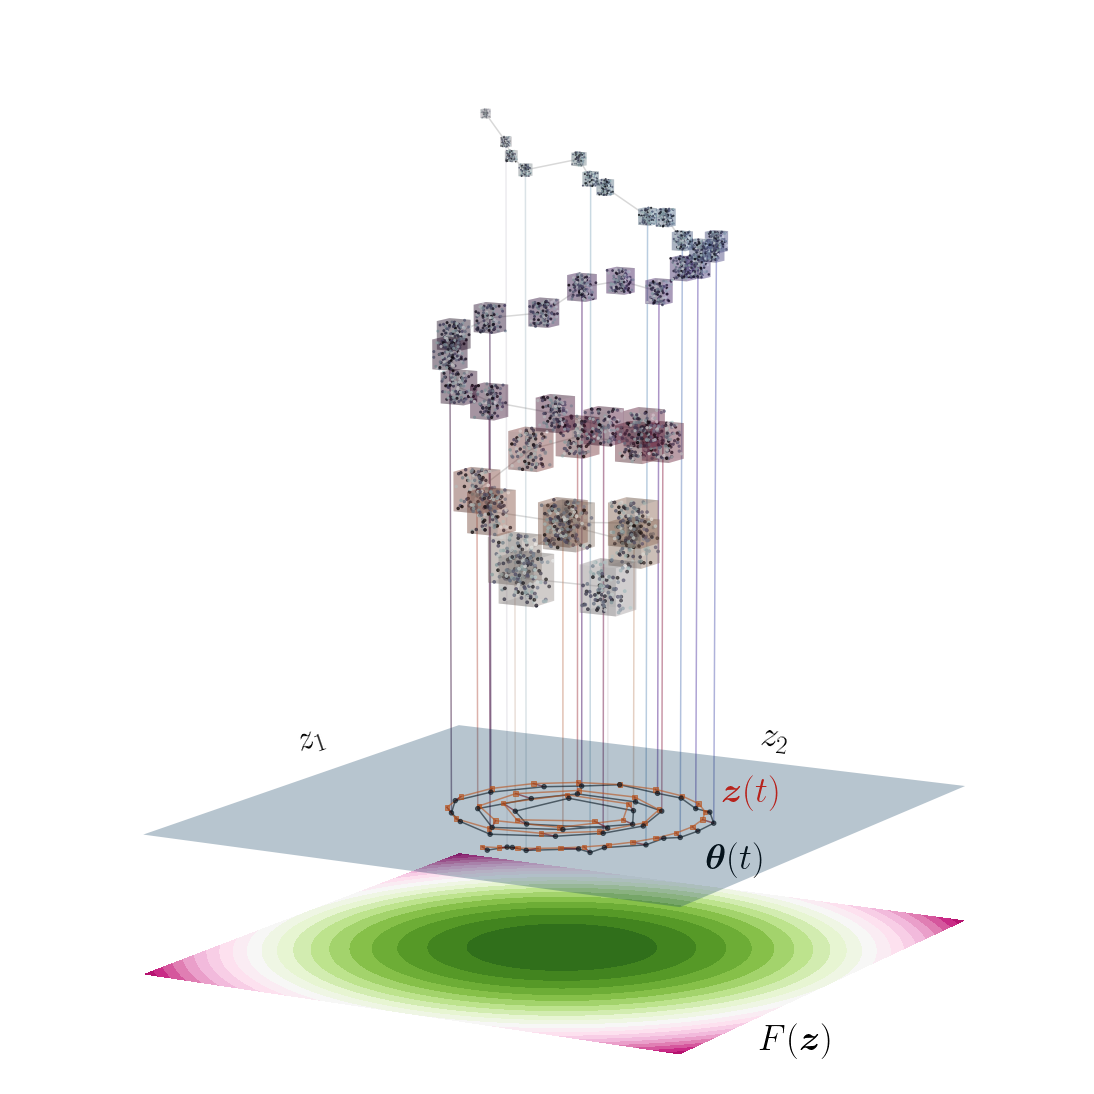

In [369]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.rcParams['text.usetex'] = True
class point:
    def __init__(self,x,y,z):
        self.x=x
        self.y=y
        self.z=z
    def cubit(self,L):
        return point(self.x+L,self.y+L,self.z+L)
    def center(self,other):
        return point(0.5*(self.x+other.x),0.5*(self.y+other.y),0.5*(self.z+other.z))
    
def draw_quad(ax,p0,p1,c,alpha=0.25,nptcl=0,s=1):
    X = np.array([[p0.x, p0.x], [p0.x, p0.x]])
    Y = np.array([[p0.y, p1.y], [p0.y, p1.y]])
    Z = np.array([[p0.z, p0.z], [p1.z, p1.z]])
    ax.plot_surface(X,Y,Z, alpha=alpha,color=c)   
    X = np.array([[p1.x, p1.x], [p1.x, p1.x]])
    ax.plot_surface(X,Y,Z, alpha=alpha,color=c)   
    X = np.array([[p0.x, p1.x], [p0.x, p1.x]])
    Y = np.array([[p0.y, p0.y], [p0.y, p0.y]])
    Z = np.array([[p0.z, p0.z], [p1.z, p1.z]])
    ax.plot_surface(X,Y,Z, alpha=alpha,color=c)   
    Y = np.array([[p1.y, p1.y], [p1.y, p1.y]])
    ax.plot_surface(X,Y,Z, alpha=alpha,color=c)   
    X = np.array([[p0.x, p0.x], [p1.x, p1.x]])
    Y = np.array([[p0.y, p1.y], [p0.y, p1.y]])
    Z = np.array([[p0.z, p0.z], [p0.z, p0.z]])
    ax.plot_surface(X,Y,Z, alpha=alpha,color=c)   
    Z = np.array([[p1.z, p1.z], [p1.z, p1.z]])
    ax.plot_surface(X,Y,Z, alpha=alpha,color=c)
    corners = np.array([[p0.x, p0.y, p0.z],
                        [p0.x, p0.y, p1.z],
                        [p0.x, p1.y, p0.z],
                        [p0.x, p1.y, p1.z],
                        [p1.x, p0.y, p0.z],
                        [p1.x, p0.y, p1.z],
                        [p1.x, p1.y, p0.z],
                        [p1.x, p1.y, p1.z]])
    #ax.scatter3D(corners[:, 0], corners[:, 1], corners[:, 2], color=c)
    pcolors=[cm.bone(i/nptcl) for i in range(nptcl)]
    if nptcl>0:
        sx=p1.x-p0.x
        X=np.random.random_sample(nptcl)*sx+p0.x
        sy=p1.y-p0.y
        Y=np.random.random_sample(nptcl)*sy+p0.y
        sz=p1.z-p0.z
        Z=np.random.random_sample(nptcl)*sz+p0.z
        ax.scatter3D(X,Y,Z,c=pcolors,alpha=1.0-alpha,s=[s]*nptcl)

cmap = cm.get_cmap('twilight')
ncubes = 40
nturns=4
#TH=np.linspace(0,2*nturns*np.pi,ncubes)
R=np.linspace(150,50,ncubes)
CS=[6+i/1.4 for i in range(len(R))]
dTH=[2*c/r for c,r in zip(CS,R)]
TH=[]
for d in dTH:
    if len(TH)==0:
        th=d
    else:
        th=TH[-1]+d
    TH.append(th)
X=R*np.cos(TH)
Y=R*np.sin(TH)
#x0=50
#x1=99
#y0=50
#a=-y0/((x1**2-x0**2)-2*x0*(x1-x0))
#b=-2*x0*a
#c=-a*x1**2-b*x1
#X=a*Y*Y+b*Y+c

fig = plt.figure(figsize=(36,15))
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

SMALL_SIZE = 36
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
ax = Axes3D(fig)
xr=np.linspace(-250,250,100)
yr=np.linspace(-250,250,100)
cX,cY=np.meshgrid(xr,yr)
cZ=np.zeros((len(xr),len(xr)))
for i in range(len(xr)):
    for j in range(len(yr)):
        cZ[i,j] = -20*np.exp(((xr[i]/500)**2+(yr[j]/500)**2)/500)
ax.contourf(cX, cY, cZ, zdir='z', offset=-300, cmap=cm.PiYG, levels=20,zorder=-1)

cc=0.2
fuzz=10
fx=np.random.random_sample(ncubes)*2*fuzz-fuzz
fy=np.random.random_sample(ncubes)*2*fuzz-fuzz
fz=np.random.random_sample(ncubes)*2*fuzz-fuzz
proX=[]
proY=[]
proZ=[]
proC=[]
zX=[]
zY=[]
mapping_lines=[]
for i,(x,y) in enumerate(zip(X,Y)):
    p1=point(x+fx[i],y+fy[i],300-9*i+fz[i])
    p2=p1.cubit(CS[i])
    pc=p1.center(p2)
    proX.append(pc.x)
    proY.append(pc.y)
    proZ.append(pc.z)
    proC.append(cmap(i/len(TH)))
    draw_quad(ax,p1,p2,cmap(i/len(TH)),alpha=0.25,nptcl=100,s=0.05+0.2*i)
    mapping_lines.append(ax.plot3D([pc.x,pc.x],[pc.y,pc.y],[pc.z,-200],c=cmap(i/len(TH)),alpha=0.5,zorder=1)[0])
    cc+=0.07
pX=np.array([[-250,-250],[250,250]])
pY=np.array([[-250, 250],[-250,250]])
pZ=np.array([[-200, -200],[-200,-200]])
ax.plot_surface(pX,pY,pZ,alpha=0.3)
ax.plot3D(proX,proY,proZ,alpha=0.3,color='gray',zorder=1)
ax.plot3D(proX,proY,[-200]*len(proX),alpha=0.6,color='black',zorder=1)
ax.scatter3D(proX,proY,[-200]*len(proX),alpha=0.6,color='black',marker='o',zorder=1)
#ax.plot3D(X,Y,[-200]*len(proX),alpha=0.6)

labels={}
labels['z1']=ax.text(100,-200,-160,r'$z_1$','x')
labels['z2']=ax.text(-200,80,-180,r'$z_2$','y')
labels['x(t)']=ax.text(100,220,200,r'${\boldsymbol x}(t)$')
labels['map']=ax.text(100,210,0,r'${\boldsymbol \theta}({\boldsymbol x})\mapsto {\boldsymbol z}$',(-1,-1,20))
labels['F(z)']=ax.text(400,400,-250,r'$F({\boldsymbol z})$')
labels['Th(t)']=ax.text(300,300,-160,r'${\boldsymbol\theta}(t)$')

ax.view_init(10,30)
ax.axis('off')
ax.auto_scale_xyz([-250,250], [-250, 250], [-160, 160])
plt.savefig('hmmdfig.png',bbox_inches='tight')

ax.plot3D(X,Y,[-200]*len(proX),alpha=0.6,color=cm.hot(0.5))
ax.scatter3D(X,Y,[-200]*len(proX),alpha=0.6,color=cm.hot(0.5),marker='s')
for x1,x2,y1,y2 in zip(proX,X,proY,Y):
    ax.plot3D([x1,x2],[y1,y2],[-200]*2,alpha=0.6,color=cm.hot(0.2))
for i in range(0,len(mapping_lines)-1,2):
    ax.lines.remove(mapping_lines[i])
ax.texts.remove(labels['x(t)'])
ax.texts.remove(labels['map'])
labels['z(t)']=ax.text(275,300,-120,r'${\boldsymbol z}(t)$',color=cm.hot(0.4))
ax.auto_scale_xyz([-250,250], [-250, 250], [-160, 160])
plt.savefig('hmmdfig2.png',bbox_inches='tight')
plt.show()